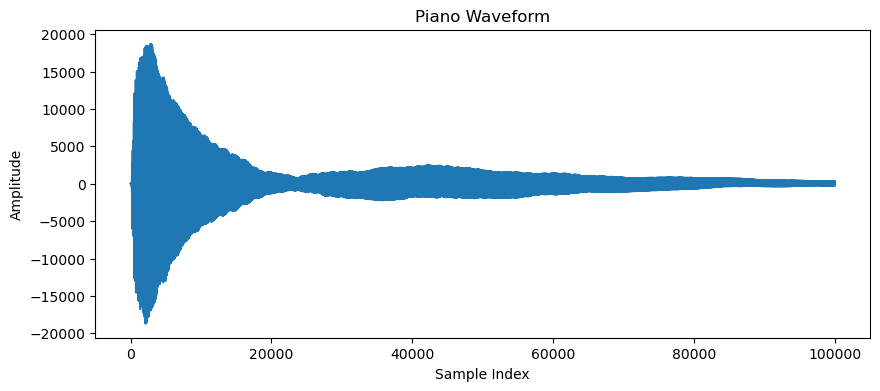

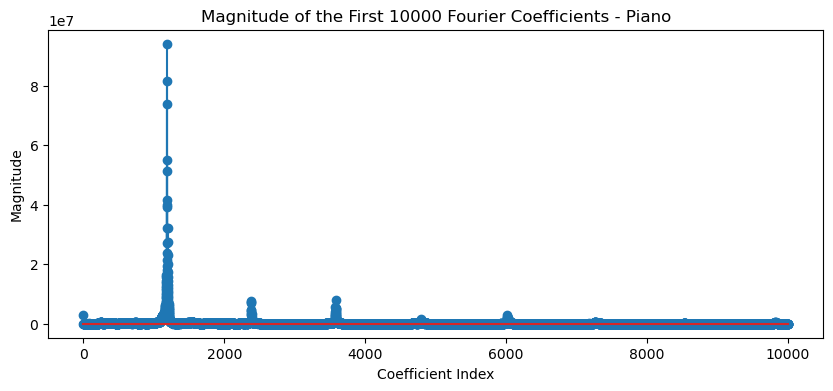

The instrument Piano is playing the note: D# (524.79 Hz)


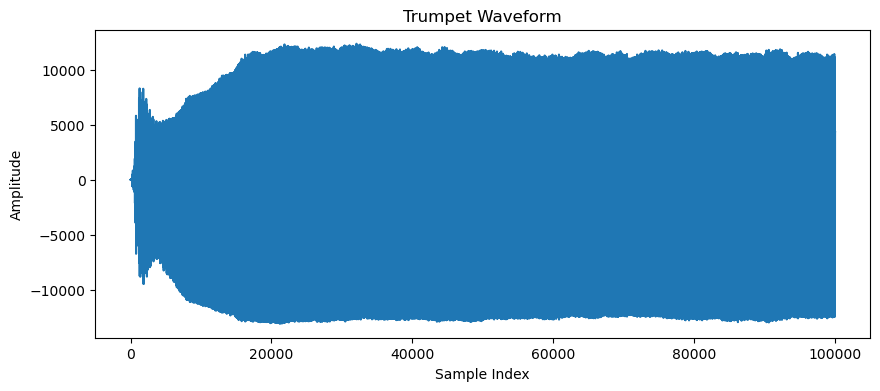

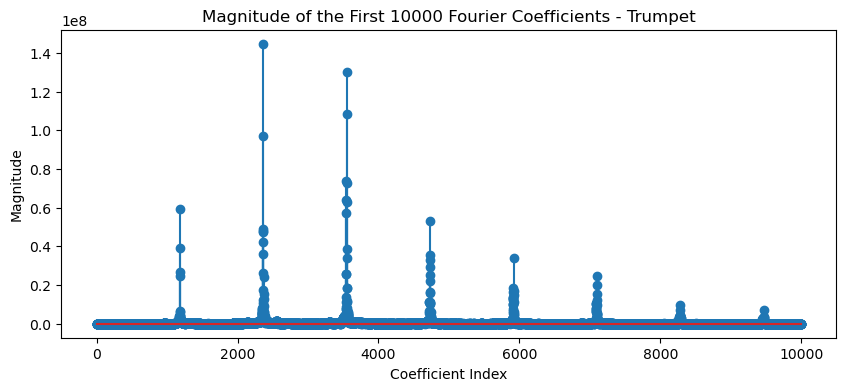

The instrument Trumpet is playing the note: D# (1043.85 Hz)


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def load_waveform(file_path):
    waveform = np.loadtxt(file_path)
    return waveform

def plot_waveform(waveform, instrument):
    plt.figure(figsize=(10, 4))
    plt.plot(waveform)
    plt.title(f'{instrument} Waveform')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.show()

def plot_fft_magnitudes(waveform, N, instrument):
    fft_result = np.fft.fft(waveform)
    magnitudes = np.abs(fft_result)[:N]
    plt.figure(figsize=(10, 4))
    plt.stem(magnitudes, use_line_collection=True)
    plt.title(f'Magnitude of the First {N} Fourier Coefficients - {instrument}')
    plt.xlabel('Coefficient Index')
    plt.ylabel('Magnitude')
    plt.show()
    
def calculate_note(frequency):
    notes = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    note_index = int(np.round(12 * np.log2(frequency / 440.0))) % 12
    note = notes[note_index]
    return note

def analyze_instrument_waveform(file_path, instrument):
    waveform = load_waveform(file_path)
    N_coefficients = 10000
    fft_result = np.fft.fft(waveform)
    frequencies = np.fft.fftfreq(len(waveform), d=1/44100)
    peak_frequency = np.abs(frequencies[np.argmax(np.abs(fft_result))])
    note = calculate_note(peak_frequency)
    print(f"The instrument {instrument} is playing the note: {note} ({peak_frequency:.2f} Hz)")


N_coefficients = 10000
piano_file_path = r"C:\Users\HP-ENVY\Downloads\piano.txt"
trumpet_file_path = r"C:\Users\HP-ENVY\Downloads\trumpet.txt"

piano_waveform = load_waveform(piano_file_path)
plot_waveform(piano_waveform, "Piano")
plot_fft_magnitudes(piano_waveform, N_coefficients, "Piano")
analyze_instrument_waveform(piano_file_path, "Piano")


trumpet_waveform = load_waveform(trumpet_file_path)
plot_waveform(trumpet_waveform, "Trumpet")
plot_fft_magnitudes(trumpet_waveform, N_coefficients, "Trumpet")
analyze_instrument_waveform(trumpet_file_path, "Trumpet")